In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.151 Seconds
Building M ...
	Done. Took 0.128 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 28.311
	Done. Took 0.762 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2): 8.944*(0.144)^t + 8.206*(0.193)^t + -9.093*(-0.017)^t + -9.860*(0.496)^t + 1.803028 * delta(t,0)
		RMSE = 0.392
		Matlab: [ 8.94  0.14  8.21  0.19 -9.09 -0.02 -9.86  0.5 ]
	Done. Took 2.618 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3): 3.801*(-0.129)^t + 8.495*(0.141)^t + 1.788*(0.600)^t + -3.635*(0.479)^t + -10.449656 * delta(t,0)
		RMSE = 0.108
		Matlab: [ 3.8  -0.13  8.5   0.14  1.79  0.6  -3.63  0.48]
	Done. Took 3.693 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1): 3.342*(0.071)^t + -1.661*(-0.041)^t + -2.117*(0.110)^t + 0.667*(-0.252)^t + -0.230192 * delta(t,0)
		RMSE = 0.014
		Matlab: [ 3.3

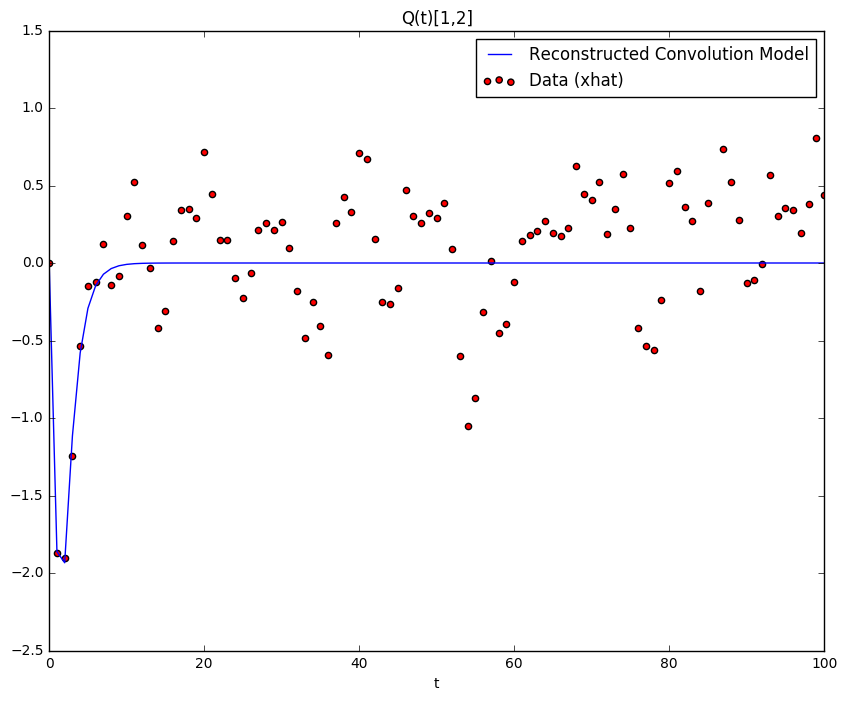

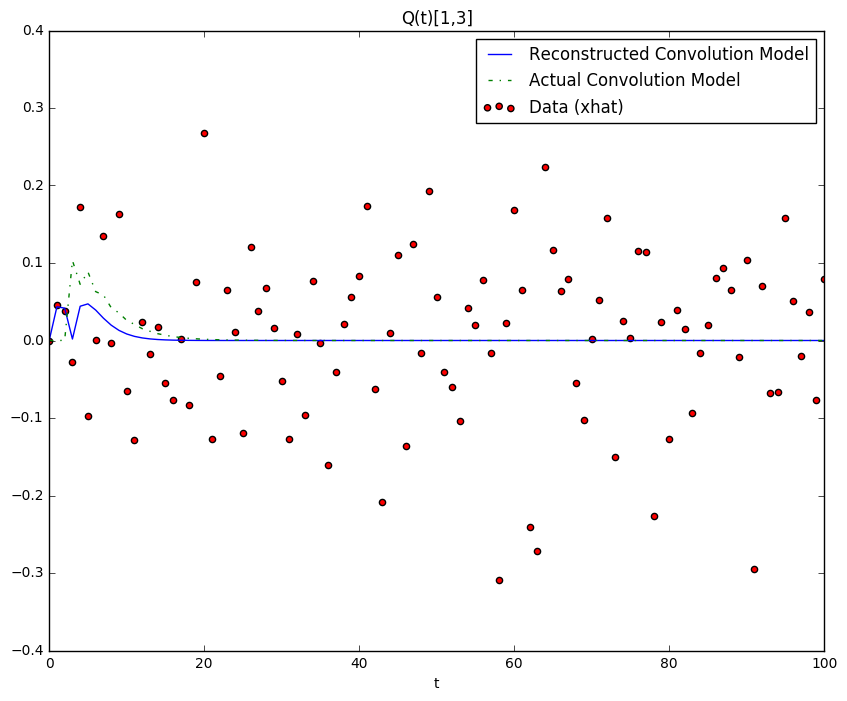

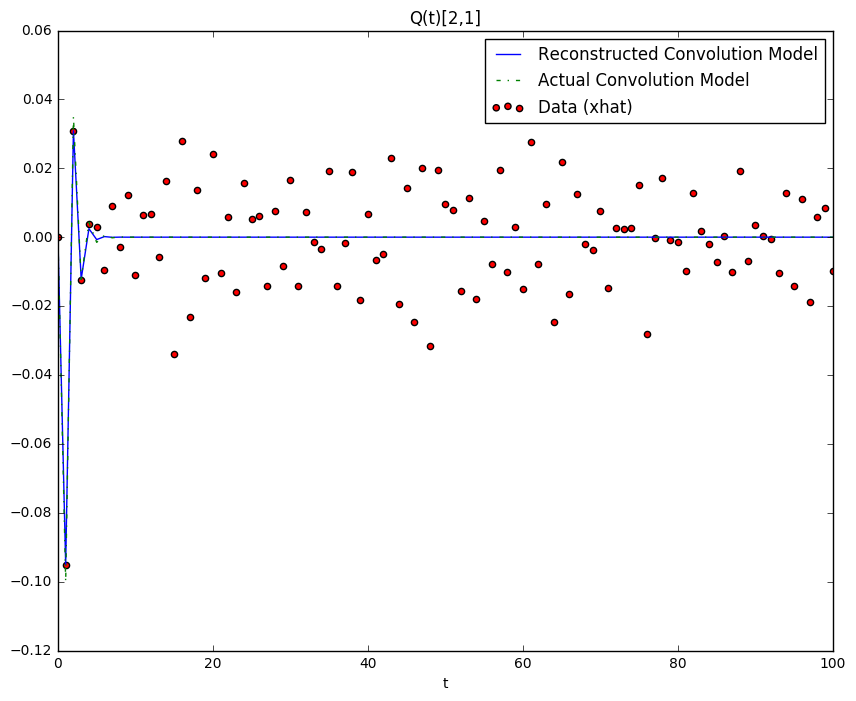

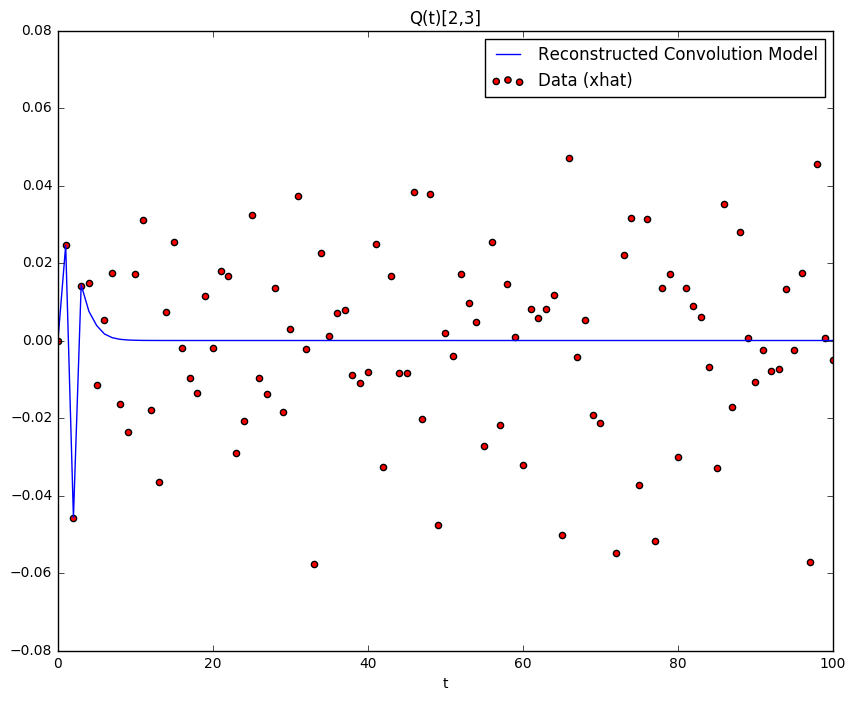

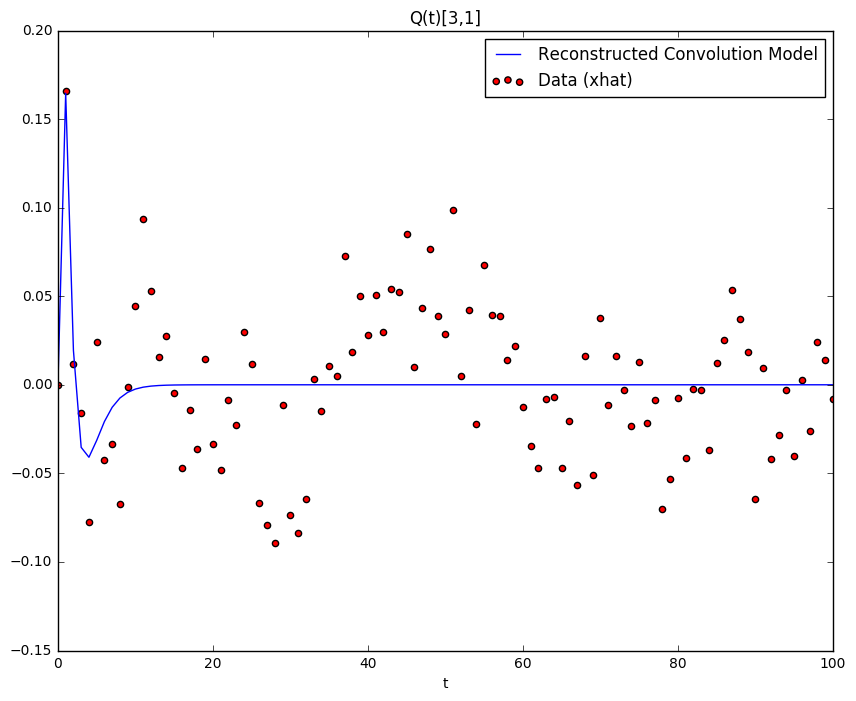

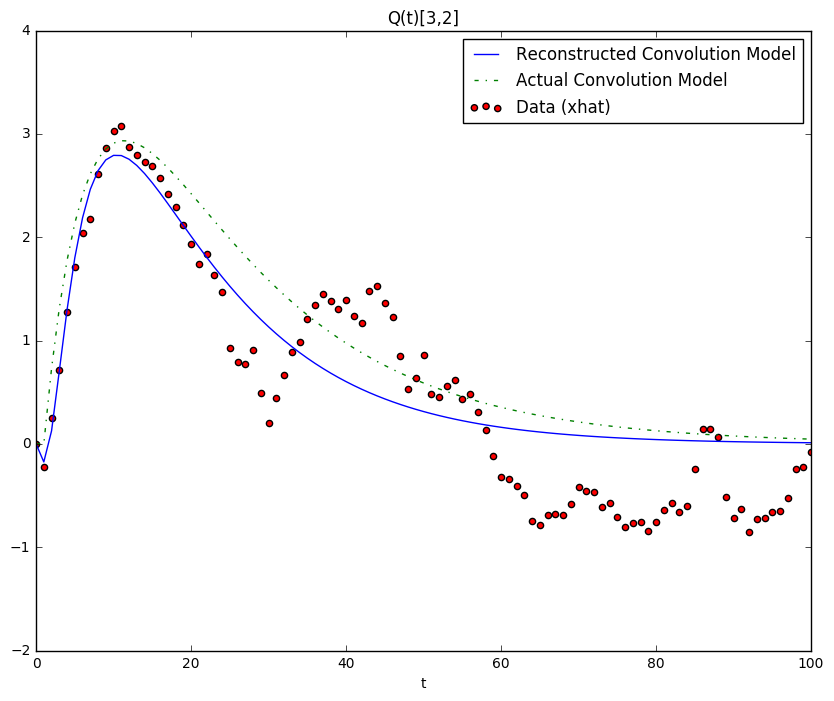

In [11]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
u = np.random.rand(R * 6 + 1, 3) * 2 - 1
y = ss_sim(A, B, C, u)

Pbool = np.identity(3)

real_params = {
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (3, 2): [7.684, .95, -8.588, .85]
}

recon = Reconstructor(debug=True, r=R, Pbool=Pbool, max_iterations=10000, bounds=10, order=4, 
                      real_params=real_params, robust=False, njobs=1)
rs = recon.unmeasured(y,plot=True)  #, ij=(1,3))

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [12]:
cols = ['1', '2', '3']

subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('magnitudes([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

magnitudes([8.94397158081 0.143596749076 8.20560777962 0.193382726309 -9.09309117965 -0.016975350541 -9.85951573167 0.495698868953 ; 3.80128407696 -0.128674879087 8.49518692064 0.141455509564 1.7877195524 0.599627400638 -3.63453408488 0.4790083237 ; 3.3415870012 0.0713065864882 -1.66107241349 -0.0408781975197 -2.11728517807 0.110150174953 0.666962782176 -0.2519902164 ; -3.04186036526 0.157410709965 2.84637160287 0.0385089461222 0.302634851902 0.423234286203 -2.45521838576 -0.108197798822 ; -1.64023802667 0.240526786822 4.51852958041 0.350375294398 -1.61735739723 0.286700275865 -1.02125286414 0.548724189851 ; 10.0 0.933752425526 -5.94906569133 0.883641786456 -10.0 0.745024081371 6.36714474352 0.501663851079], {'1', '2', '3'});
